In [12]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
words = open("names.txt", 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [14]:
len(words)

32033

In [31]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [193]:
# Build the dataset
block_size = 3 # context length: how many characters do we take to predict the next character?
X, Y = [], []

for w in words:
    #print(f'{w}\n')
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [194]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

# Neural network time

We want to write a Multilayer Perceptron to create words.

In [195]:
C = torch.randn((27, 2))

In [196]:
C[5]

tensor([ 0.6300, -0.9739])

In [197]:
print(C[X])
print(C[X].shape)

tensor([[[-1.0575,  0.9491],
         [-1.0575,  0.9491],
         [-1.0575,  0.9491]],

        [[-1.0575,  0.9491],
         [-1.0575,  0.9491],
         [ 0.6300, -0.9739]],

        [[-1.0575,  0.9491],
         [ 0.6300, -0.9739],
         [ 0.4237, -1.3882]],

        ...,

        [[ 0.0266, -1.5236],
         [ 0.0266, -1.5236],
         [-0.4923,  1.2870]],

        [[ 0.0266, -1.5236],
         [-0.4923,  1.2870],
         [ 0.0266, -1.5236]],

        [[-0.4923,  1.2870],
         [ 0.0266, -1.5236],
         [-2.0733, -0.8512]]])
torch.Size([228146, 3, 2])


In [198]:
X[13, 2]

tensor(1)

In [199]:
C[X][13, 2]

tensor([-0.1649,  0.5148])

In [200]:
C[1]

tensor([-0.1649,  0.5148])

In [201]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [202]:
W1 = torch.randn((6, 100)).float()
b1 = torch.randn(100).float()

In [203]:
# emb @ W1 + b1 - this won't work because shapes arent right 
# RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [204]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[-1.0575,  0.9491, -1.0575,  0.9491, -1.0575,  0.9491],
        [-1.0575,  0.9491, -1.0575,  0.9491,  0.6300, -0.9739],
        [-1.0575,  0.9491,  0.6300, -0.9739,  0.4237, -1.3882],
        ...,
        [ 0.0266, -1.5236,  0.0266, -1.5236, -0.4923,  1.2870],
        [ 0.0266, -1.5236, -0.4923,  1.2870,  0.0266, -1.5236],
        [-0.4923,  1.2870,  0.0266, -1.5236, -2.0733, -0.8512]])

In [205]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([228146, 6])

In [206]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [207]:
a.shape

torch.Size([18])

In [208]:
a.view(2, 3, 3) # 6 and 3 multiply to 18

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])

In [209]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [210]:
emb.shape

torch.Size([228146, 3, 2])

In [213]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [214]:
h.shape

torch.Size([228146, 100])

In [215]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

logits = h @ W2 + b2

In [216]:
logits.dtype

torch.float32

In [217]:
logits.shape

torch.Size([228146, 27])

In [218]:
counts = logits.exp()

In [219]:
prob = counts / counts.sum(1, keepdims=True)

In [220]:
prob.shape

torch.Size([228146, 27])

In [221]:
prob[0].sum()

tensor(1.)

In [223]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [151]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

## combine everything
as andrej says, make respectable

## Build the dataset! (splits this time)

In [378]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)

            context = context[1:] + [ix]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


#### Initial Setup
create our weights & biases for each layer

In [455]:
g = torch.Generator().manual_seed(2147483647) # for reproducability
C = torch.randn((27, 10))

# layer 1
W1 = torch.randn((30, 200)).float()
b1 = torch.randn(200).float()

# layer 2
W2 = torch.randn((200, 27))
b2 = torch.randn(27)

params = [C, W1, b1, W2, b2]

In [456]:
sum(p.nelement() for p in params)

11897

In [457]:
for p in params:
    p.requires_grad = True

#### Forward Pass & Backward Pass

In [458]:
lri = []
lossi = []
stepi = []

In [475]:
for i in range(200000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    
    logits = h @ W2 + b2
    
    ##
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # these surrounded lines are inefficient
    # we're legit making a new tensor every 5 seconds
    loss = F.cross_entropy(logits, Ytr[ix]) #exact same loss

    #print(loss.item())
    
    ## backward pass
    for p in params:
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in params:
        p.data += -lr * p.grad

    # track stats
    stepi.append(i)
    #lri.append(lre[i])
    lossi.append(loss.log10().item())
    
print(loss.item())

2.3466179370880127


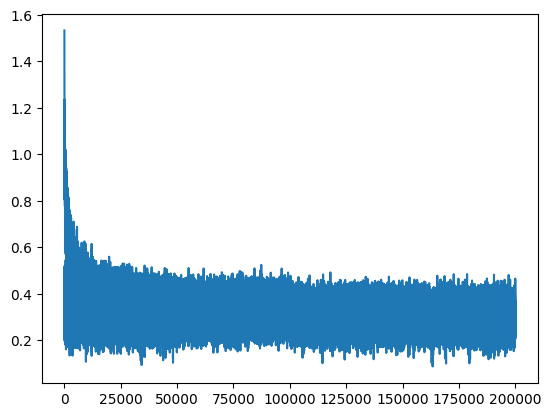

In [476]:
plt.plot(stepi, lossi)

In [477]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0617, grad_fn=<NllLossBackward0>)

In [478]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1248, grad_fn=<NllLossBackward0>)

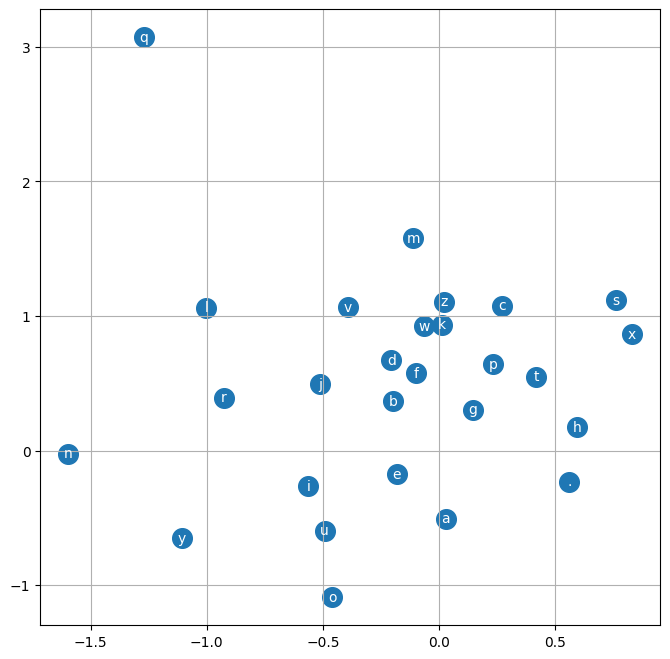

In [454]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [449]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

# sample from the model:

In [483]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size

    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

carman.
amillivia.
jmoni.
tatyannah.
sae.
mahnel.
delyah.
jareei.
nellara.
chaiir.
kaleigh.
ham.
joci.
quintis.
lilea.
jadiquinterri.
jarisixa.
jenni.
sabee.
deciia.
